# 【課題1】練習のために特徴量の選択
* データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出す

In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')

df_train = df_train.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]

df_train.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# 【課題2】回帰問題のパイプライン
* データを簡単に分析、前処理する
* 線形回帰 による学習、推定、評価、可視化までのパイプラインを作成する

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


欠損はなさそう

In [3]:
df_train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


標準偏差の値が大きいので、標準化が必要そう  
前処理していく

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# warnが出るので、変換 int to float
df_train = df_train.astype('float')

# 標準化
scaler = StandardScaler()
scaler.fit(df_train)
scaler.transform(df_train)
df_std = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)

# 説明変数・目的変数に分けて格納
X = df_std.loc[:, ['GrLivArea', 'YearBuilt']]
y = df_std.loc[:, 'SalePrice']

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.head()

,GrLivArea,YearBuilt
202,-0.391136,-1.565545
1002,0.111434,1.150356
1415,0.101916,1.183477
1335,-0.345447,0.189854
564,1.483982,0.686666


学習、推定、評価、可視化までのパイプライン作成  
視化は横軸にある特徴量、縦軸に推測した住宅価格

In [5]:
from sklearn.linear_model import  LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# パイプラインインスタンス作成
pipeline = Pipeline([('reg', LinearRegression())])

# 学習
pipeline.fit(X_train, y_train)

# 推定
y_pred = pipeline.predict(X_test)

# 評価
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean_squared_error：{:.5f}'.format(mse))

# regplot用に変換 ndarray to DataFrame
df_X = pd.DataFrame(X_test).reset_index(drop=True)
df_y = pd.DataFrame({'SalePrice': y_pred})
df_Xy = pd.concat([df_X, df_y], axis=1)

# 可視化
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)
sns.regplot(x='GrLivArea', y='SalePrice', data=df_Xy, ax=axis1)
sns.regplot(x='YearBuilt', y='SalePrice', data=df_Xy, ax=axis2)

Mean_squared_error：0.34940


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# 【課題3】手法の比較
* 線形回帰(課題2でやったので割愛)
* SVM
* 決定木
* ランダムフォレスト

SVM
Mean_squared_error：0.29914


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DecisionTree
Mean_squared_error：0.35799


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest
Mean_squared_error：0.27111


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


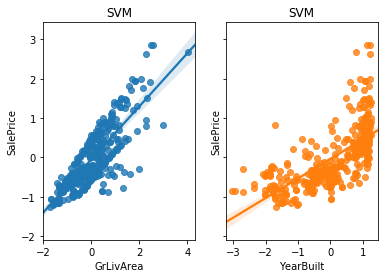

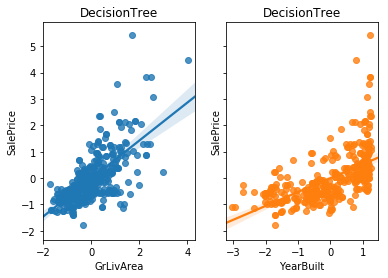

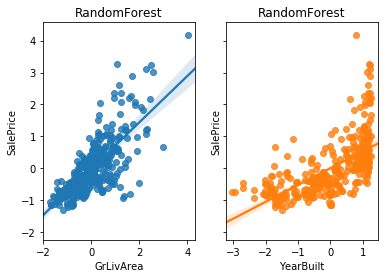

In [6]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

pipelines ={
    'SVM': Pipeline([('clf', SVR())]),
    'DecisionTree': Pipeline([('clf', DecisionTreeRegressor())]),
    'RandomForest': Pipeline([('clf', RandomForestRegressor())])
}

for model, pipeline in pipelines.items():
    print(model)
    # 学習
    pipeline.fit(X_train, y_train)

    # 推定
    y_pred = pipeline.predict(X_test)

    # 評価
    mse = metrics.mean_squared_error(y_test, y_pred)
    print('Mean_squared_error：{:.5f}'.format(mse))

    # regplot用に変換 ndarray to DataFrame
    df_X = pd.DataFrame(X_test).reset_index(drop=True)
    df_y = pd.DataFrame({'SalePrice': y_pred})
    df_Xy = pd.concat([df_X, df_y], axis=1)
    
    # 可視化
    fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)
    axis1.set_title(model)
    axis2.set_title(model)
    sns.regplot(x='GrLivArea', y='SalePrice', data=df_Xy, ax=axis1)
    sns.regplot(x='YearBuilt', y='SalePrice', data=df_Xy, ax=axis2)